In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
#Verify path to data
import os
print(os.listdir('./input'))


['sample_submission.csv', 'test.tsv', 'train.tsv', 'zipped']


In [4]:
# load training data to dataframe
train_df = pd.read_table("./input/train.tsv")

In [5]:
#review training data
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


Condition ID's
1 - New
2 - Like New
3 - Good
4 - Fair
5 - Poor

Clothing
1 - New: NWT (New With Tags), unworn, unaltered and includes the original tags.
2 - Like New: NWOT (New without tags) or very lightly used with no flaws or damage.
3 - Good: Gently used but still may have minor flaws such as pilling, stretching, or loose threads.
4 - Fair: Multiple minor flaws, defects, or damage such as rips, light stains, pilling.
5 - Poor: Heavily used and has major cosmetic flaws or damage such as holes, stains, fading, or missing buttons/beads.

Shoes 
1 - New: New, unworn and still in the original box.
2 - Like New: Unworn or only tried on. No creases, but may not be in the original box.
3 - Good: Used, but there are only a few minor flaws such as slight wear on the sole, light creases, or small scuffs.
4 - Fair: Show signs of wear and has multiple major flaws, such as holes, rips, creases, or stains, but the sole is intact.
5 - Poor: Heavily worn and have multiple major flaws, such as large holes, stains, scuffs, or the soles are not intact.

Electronics
1 - New: Unused in the original packaging.
2 - Like New: lightly used and fully functional, but does not include the original packaging.
3 - Good: Gently used and may have minor cosmetic flaws, but is fully functional.
4 - Fair: Used and has multiple flaws but is overall functional.
5 - Poor: Heavily used, has major cosmetic flaws or damage, non-functional or sold as parts.

Condition comments may appear in name or description
1 - New
    BNWT: Brand New With Tags
    BNIP: Brand New In Packet 
    MIB: Mint In Box
    NWT: New With Tags
    NIB: New In Box
    BNIB: Brand New In Box

2 - Like New
    BNWOT: Brand New Without Tags
    MWOB: Mint With Out Box
    NWOT: New without tags or very lightly used with no flaws or damage
    BNWOB: Brand New Without Box


In [6]:
# Summary stats
train_df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [7]:
# For category name, parse out the first three levels and append them to the data frame as their own fields
a, b, c, d = train_df['category_name'].str.split("/", 3).str
category_oneLevel = a
category_twoLevel = a + "/" + b
category_threeLevel = a + "/" + b + "/" + c
train_df['category_oneLevel'] = category_oneLevel
train_df['category_twoLevel'] = category_twoLevel
train_df['category_threeLevel'] = category_threeLevel

In [8]:
#review training data and verify appended columns
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_oneLevel,category_twoLevel,category_threeLevel
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Men/Tops,Men/Tops/T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Electronics/Computers & Tablets,Electronics/Computers & Tablets/Components & P...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Women/Tops & Blouses,Women/Tops & Blouses/Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home/Home Décor,Home/Home Décor/Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Women/Jewelry,Women/Jewelry/Necklaces


In [9]:
#pd.Series([y for x in train_df.values['item_description'].flatten() for y in x.split()]).value_counts()

# Feature extraction from text
# Method: bag of words 
# https://pythonprogramminglanguage.com
 
from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe for rows with a top level category of "Women"
MensTees_df = train_df.loc[train_df['category_threeLevel'] == 'Men/Tops/T-shirts']

#randomly split it into smaller dataframes to avoid memory error
#from sklearn.model_selection import train_test_split

#train_women_df, test_women_df = train_test_split(women_df, test_size=0.8)

MensTees_df.describe()

#breaking these out to step through and isolate memory error
#corpus = women_df['item_description'][pd.notnull(women_df['item_description'])]

#vectorizer = CountVectorizer()
#print( vectorizer.fit_transform(corpus).todense() )
#print( vectorizer.vocabulary_ )
 

,train_id,item_condition_id,price,shipping
count,1.510800e+04,15108.000000,15108.000000,15108.000000
mean,7.374128e+05,2.142441,18.352495,0.394559
std,4.273357e+05,0.871937,16.307762,0.488772
min,0.000000e+00,1.000000,0.000000,0.000000
25%,3.732120e+05,1.000000,10.000000,0.000000
50%,7.299650e+05,2.000000,14.000000,0.000000
75%,1.113179e+06,3.000000,20.000000,1.000000
max,1.482464e+06,5.000000,309.000000,1.000000


In [10]:
corpus = MensTees_df['item_description'][pd.notnull(MensTees_df['item_description'])]

In [11]:
corpus.describe()

count                  15108
unique                 12860
top       No description yet
freq                    1257
Name: item_description, dtype: object

In [25]:
vectorizer = CountVectorizer(stop_words="english", max_df=0.2)

In [26]:
#This is where I get the memory error if I'm running with the entire training set
print(vectorizer.fit_transform(corpus).toarray())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [27]:
transformed = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

['00',
 '000',
 '00pm',
 '01',
 '010',
 '0101531',
 '03',
 '04',
 '046va92367513p',
 '05',
 '06',
 '063',
 '10',
 '100',
 '1000',
 '100000000',
 '100cm',
 '100percentbrandapparel',
 '100th',
 '1016',
 '102',
 '104',
 '104cm',
 '106',
 '106cm',
 '108cm',
 '109',
 '10lbs',
 '10th',
 '10x',
 '10y',
 '11',
 '110',
 '115lbs',
 '12',
 '120lbs',
 '120th',
 '123456789',
 '124',
 '125lbs',
 '12each',
 '12m',
 '12pm',
 '12w',
 '12wide',
 '13',
 '138',
 '13th',
 '14',
 '140',
 '148',
 '149',
 '14zombies',
 '15',
 '150',
 '150lbs',
 '15great',
 '15inches',
 '15ss',
 '16',
 '163',
 '1636',
 '16ss',
 '16th',
 '17',
 '170',
 '172',
 '175',
 '1776',
 '17great',
 '17th',
 '18',
 '180',
 '182',
 '18m',
 '18th',
 '18x28',
 '19',
 '1922',
 '1941',
 '1942',
 '1952',
 '1955',
 '1958',
 '1960',
 '1962',
 '1964',
 '1965',
 '1966',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1978',
 '1980',
 '1980s',
 '1981',
 '1984',
 '1985',
 '1986',
 '1987',
 '1989',
 '199',
 '1990',
 '1990s',


In [17]:
print( vectorizer.vocabulary_ )

{'description': 2482, 'worn': 9205, 'washed': 9017, 'sent': 7290, 'men': 5264, 'nike': 5696, 'dri': 2731, 'fit': 3234, 'shirt': 7391, 'blue': 1220, 'items': 4335, 'come': 1999, 'clean': 1871, 'smoke': 7597, 'pet': 6147, 'free': 3379, 'home': 4016, 'brand': 1349, 'new': 5662, 'tags': 8147, 'white': 9096, 'burgundy': 1491, 'mens': 5270, 'xxl': 9286, 'cruise': 2260, 'ship': 7381, 'shirts': 7395, 'grey': 3694, 'royal': 7038, 'caribbean': 1630, 'pocket': 6287, 'embroidered': 2896, 'blank': 1184, 'soverign': 7698, 'seas': 7244, 'graphic': 3660, 'nwot': 5775, 'black': 1174, 'tee': 8229, 'screen': 7213, 'print': 6427, 'garbage': 3481, 'lettering': 4794, 'size': 7493, 'good': 3614, 'condition': 2058, 'official': 5822, 'licensed': 4810, 'product': 6449, '2xl': 212, 'like': 4827, 'quality': 6567, 'material': 5180, 'staple': 7834, 'piece': 6189, 'basically': 991, 'wear': 9046, 'tear': 8215, 'great': 3674, 'soft': 7642, 'used': 8782, 'barely': 968, 'tell': 8244, 'cleaning': 1874, 'closet': 1907, 'a

In [18]:
import operator
sorted_vectorizer = sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

In [19]:
#type(vectorizer.vocabulary_)
#type(sorted_vectorizer)
print( sorted_vectorizer.vocabulary_ )

AttributeError: 'list' object has no attribute 'vocabulary_'

TypeError: cannot perform reduce with flexible type

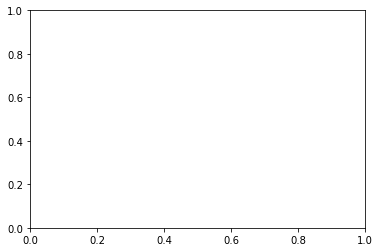

In [29]:
plt.hist(vectorizer.vocabulary_.items(), bins=10**np.linspace(0, 3, 25))
#plt.title('Log scaled price distribution histogram')
#plt.xscale('log') 
plt.show()

In [37]:
from collections import OrderedDict
#vectorizer.vocabulary_.items()
OrderedDict(sorted(vectorizer.vocabulary_.items(), key=lambda t: t[1]), reversed = "True")

OrderedDict([('00', 0),
             ('000', 1),
             ('00pm', 2),
             ('01', 3),
             ('010', 4),
             ('0101531', 5),
             ('03', 6),
             ('04', 7),
             ('046va92367513p', 8),
             ('05', 9),
             ('06', 10),
             ('063', 11),
             ('10', 12),
             ('100', 13),
             ('1000', 14),
             ('100000000', 15),
             ('100cm', 16),
             ('100percentbrandapparel', 17),
             ('100th', 18),
             ('1016', 19),
             ('102', 20),
             ('104', 21),
             ('104cm', 22),
             ('106', 23),
             ('106cm', 24),
             ('108cm', 25),
             ('109', 26),
             ('10lbs', 27),
             ('10th', 28),
             ('10x', 29),
             ('10y', 30),
             ('11', 31),
             ('110', 32),
             ('115lbs', 33),
             ('12', 34),
             ('120lbs', 35),
             ('120th'